# Загрузка датасета
Мной был выбран следующий датасет: https://www.kaggle.com/c/m5-forecasting-accuracy/overview

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
df_cl = pd.read_csv('calendar.csv', sep =',')
df_cl.head(2)

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0


In [3]:
df_sales = pd.read_csv('sales_train_validation.csv', sep =',')
df_sales.head(2)

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [4]:
df_prices = pd.read_csv('sell_prices.csv', sep =',')
df_prices.head(2)

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58


# 1. Первичный анализ данных

В этом соревновании надо сделать предсказание продаж на 28 дней вперед для каждого товара и для каждого магазина из датасета. Для этого можно использовать инфоррмацию о продажах товаров за предыдущие 1914 дней. Исследование проводится для магазинов из 3-х штатов (CA, TX, WI). Вся эта информация содержится в трех таблицах: "calendar.csv", "sales_train_validation.csv" и "sell_prices.csv". Таблицу "sales_train_validation.csv" надо использовать для валидации предсказания на следующие 28 дней.

Цель моего проекта - составить представление о том что из себя представляют данные, а также попробовать найти общие закономерности в данных и попробовать предложить модели машинного обучения для решения данной задачи.

Исследование будет проходить в следующем порядке:
1. Первичный анализ данных,
2. Предобработка данных,
3. Визуальный анализ данных (EDA),
4. Проверка статистических гипотез,
5. Предсказание временного ряда,
6. Выводы.

Для начала опишем каждую таблиц отдельно.

### calendar.csv

In [5]:
df_cl.head(8)

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1
5,2011-02-03,11101,Thursday,6,2,2011,d_6,NaN,NaN,NaN,NaN,1,1,1
6,2011-02-04,11101,Friday,7,2,2011,d_7,NaN,NaN,NaN,NaN,1,0,0
7,2011-02-05,11102,Saturday,1,2,2011,d_8,NaN,NaN,NaN,NaN,1,1,1


In [6]:
df_cl.tail(2)

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,NaN,NaN,NaN,NaN,0,0,0
1968,2016-06-19,11621,Sunday,2,6,2016,d_1969,NBAFinalsEnd,Sporting,Father's day,Cultural,0,0,0


In [7]:
df_cl.describe()

,wm_yr_wk,wday,month,year,snap_CA,snap_TX,snap_WI
count,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000
mean,11347.086338,3.997461,6.325546,2013.288471,0.330117,0.330117,0.330117
std,155.277043,2.001141,3.416864,1.580198,0.470374,0.470374,0.470374
min,11101.000000,1.000000,1.000000,2011.000000,0.000000,0.000000,0.000000
25%,11219.000000,2.000000,3.000000,2012.000000,0.000000,0.000000,0.000000
50%,11337.000000,4.000000,6.000000,2013.000000,0.000000,0.000000,0.000000
75%,11502.000000,6.000000,9.000000,2015.000000,1.000000,1.000000,1.000000
max,11621.000000,7.000000,12.000000,2016.000000,1.000000,1.000000,1.000000


In [8]:
df_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
date            1969 non-null object
wm_yr_wk        1969 non-null int64
weekday         1969 non-null object
wday            1969 non-null int64
month           1969 non-null int64
year            1969 non-null int64
d               1969 non-null object
event_name_1    162 non-null object
event_type_1    162 non-null object
event_name_2    5 non-null object
event_type_2    5 non-null object
snap_CA         1969 non-null int64
snap_TX         1969 non-null int64
snap_WI         1969 non-null int64
dtypes: int64(7), object(7)
memory usage: 215.4+ KB


Эта таблица описывают каждый день в исследуемом датасете.

Столбцы: "date", "wm_yr_wk", "weekday", "wday", "month", "year", "d" - индификаторы даты. "wm_yr_wk" - id недели в датасете. Столбец "d" - id конкретного дня в датасете.

"event_name_1", "event_type_1", "event_name_2", "event_type_2" - описывают какие примечательные события происходили в этот день. Посмотрим сколько всего категорий событий есть в датасете.

In [9]:
df_cl.event_type_1.unique(), \
df_cl.event_type_2.unique()

(array([nan, 'Sporting', 'Cultural', 'National', 'Religious'], dtype=object),
 array([nan, 'Cultural', 'Religious'], dtype=object))

Последние 3 столбца - бинарный индикатор. Он отвечает была ли в этот день в конкретном штате бюджетная раздача товаров по талонам - 1, или нет - 0.

### sales_train_validation.csv


изучить и описать, как были собраны данные, какие признаки, типы переменных есть в датасете.
Описать, как будет происходить исследование, какая цель вашего проекта.

In [10]:
df_sales.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [11]:
df_sales.cat_id.unique()

array(['HOBBIES', 'HOUSEHOLD', 'FOODS'], dtype=object)

In [12]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1919 entries, id to d_1913
dtypes: int64(1913), object(6)
memory usage: 446.4+ MB


Эта таблица связывает каждый товар "item_id" из конретного магазина "store_id" и информацию о том, сколько единиц этого товара было продано в каждый из 1914 дней.

### sell_prices.csv

In [13]:
df_prices.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [14]:
df_prices.describe()

,wm_yr_wk,sell_price
count,6.841121e+06,6.841121e+06
mean,1.138294e+04,4.410952e+00
std,1.486100e+02,3.408814e+00
min,1.110100e+04,1.000000e-02
25%,1.124700e+04,2.180000e+00
50%,1.141100e+04,3.470000e+00
75%,1.151700e+04,5.840000e+00
max,1.162100e+04,1.073200e+02


In [15]:
len(df_prices.wm_yr_wk.unique())

282

In [16]:
df_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
store_id      object
item_id       object
wm_yr_wk      int64
sell_price    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 208.8+ MB


Для каждого товара из каждого магазина ("item_id" + "store_id") эта таблица показывает стоимость этого товара в каждую неделю из 282 недель, учавствующий в исследовании. 

# 2. Предобработка данных

Будем использовать данные, описывающие изменения параметров ежедневно. Для этого возьмем для исследования только таблицу "calendar.csv" и дополним ее информацией из других таблиц.

Объеденим данные о продажах по признаку категории товара.

In [17]:
temp = df_sales.groupby(['cat_id'])[[c for c in df_sales.columns if c.startswith('d_')]].sum()

temp = temp.T
temp['total_sl_vl'] = temp['FOODS'] + temp['HOBBIES'] + temp['HOUSEHOLD'] 
temp = temp.reset_index()
temp.rename(columns={'index':'d', 'FOODS':'food_sl_vl', \
                     'HOBBIES':'hobbies_sl_vl', 'HOUSEHOLD':'household_sl_vl', }, inplace=True)
df_cl = pd.merge(df_cl, temp, how='outer', on=['d'])

Теперь объединим данные о продажах по штатам отдельно, а также по штатам и категории товара вместе. 

In [18]:
df_sales['st_cat_id'] = df_sales['state_id'] + '_' + df_sales['cat_id'] + '_sl_vl'
df_sales.drop(['cat_id', 'state_id'], axis = 1, inplace = True)

temp = df_sales.groupby(['st_cat_id'])[[c for c in df_sales.columns if c.startswith('d_')]].sum()
temp = temp.T
temp = temp.reset_index()
temp.rename(columns={'index':'d'}, inplace=True)
df_cl = pd.merge(df_cl, temp, how='outer', on=['d'])

df_cl['total_TX_sl_vl'] = df_cl['TX_FOODS_sl_vl'] + df_cl['TX_HOBBIES_sl_vl'] + df_cl['TX_HOUSEHOLD_sl_vl']
df_cl['total_CA_sl_vl'] = df_cl['CA_FOODS_sl_vl'] + df_cl['CA_HOBBIES_sl_vl'] + df_cl['CA_HOUSEHOLD_sl_vl']
df_cl['total_WI_sl_vl'] = df_cl['WI_FOODS_sl_vl'] + df_cl['WI_HOBBIES_sl_vl'] + df_cl['WI_HOUSEHOLD_sl_vl']

Потом добавим цены для категорий товаров. (Цены в указанных штатах примерно равны.)

In [19]:
df_prices['category'] = df_prices['item_id'].map(lambda it: it[:-6])

mean_price_cat = df_prices.groupby(['wm_yr_wk', 'category'])[['sell_price']].mean()
mean_price_cat = mean_price_cat.reset_index()

mean_price_tot = df_prices.groupby(['wm_yr_wk'])[['sell_price']].mean()
mean_price_tot = mean_price_tot.reset_index()

mean_price_tot['food_price'] = mean_price_cat[mean_price_cat['category']=='FOODS']\
                                .reset_index()['sell_price']
mean_price_tot['hobbies_price'] = mean_price_cat[mean_price_cat['category']=='HOBBIES']\
                                .reset_index()['sell_price']
mean_price_tot['household_price'] = mean_price_cat[mean_price_cat['category']=='HOUSEHOLD']\
                                .reset_index()['sell_price']
mean_price_tot.rename(columns={'sell_price':'total_price'}, inplace=True)

df_cl = pd.merge(df_cl, mean_price_tot, how='outer', on=['wm_yr_wk'])

Для иссдледования возьмом только те даты, объем продаж для которых нам известен.

In [20]:
df_cl = df_cl.iloc[:1913]

Приведем получившийся датасет к формату временных рядов.

In [21]:
df_cl['Datetime'] = pd.to_datetime(df_cl.date,format='%Y-%m-%d') 
df_cl.index  = df_cl.Datetime
df_cl.drop(['date', 'Datetime'], axis = 1, inplace = True)

df_cl['day'] = df_cl.index.day

Приведем и остальные колонки к правильному виду.

In [22]:
df_cl.snap_CA = df_cl.snap_CA.astype('bool')
df_cl.snap_TX = df_cl.snap_TX.astype('bool')
df_cl.snap_WI = df_cl.snap_WI.astype('bool')
df_cl.d = df_cl.d.map(lambda x: x[2:]).astype('int')

df_cl[[c for c in df_cl.columns if c.endswith('_sl_vl')]] = \
df_cl[[c for c in df_cl.columns if c.endswith('_sl_vl')]].astype('int')

df_cl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1913 entries, 2011-01-29 to 2016-04-24
Data columns (total 34 columns):
wm_yr_wk              1913 non-null int64
weekday               1913 non-null object
wday                  1913 non-null int64
month                 1913 non-null int64
year                  1913 non-null int64
d                     1913 non-null int64
event_name_1          154 non-null object
event_type_1          154 non-null object
event_name_2          4 non-null object
event_type_2          4 non-null object
snap_CA               1913 non-null bool
snap_TX               1913 non-null bool
snap_WI               1913 non-null bool
food_sl_vl            1913 non-null int64
hobbies_sl_vl         1913 non-null int64
household_sl_vl       1913 non-null int64
total_sl_vl           1913 non-null int64
CA_FOODS_sl_vl        1913 non-null int64
CA_HOBBIES_sl_vl      1913 non-null int64
CA_HOUSEHOLD_sl_vl    1913 non-null int64
TX_FOODS_sl_vl        1913 non-null int64

Некоторые таблицы теперь не нужны. Освободим память.

In [23]:
temp = []
mean_price_tot = []
mean_price_cat = []
# df_prices = []
# df_sales = []

In [24]:
df_cl.head(8)

,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,...,WI_HOBBIES_sl_vl,WI_HOUSEHOLD_sl_vl,total_TX_sl_vl,total_CA_sl_vl,total_WI_sl_vl,total_price,food_price,hobbies_price,household_price,day
Datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-29,11101,Saturday,1,1,2011,1,NaN,NaN,NaN,NaN,...,1083,1691,9438,14195,8998,4.071247,2.957808,4.671317,5.434950,29
2011-01-30,11101,Sunday,2,1,2011,2,NaN,NaN,NaN,NaN,...,926,1522,9630,13805,8314,4.071247,2.957808,4.671317,5.434950,30
2011-01-31,11101,Monday,3,1,2011,3,NaN,NaN,NaN,NaN,...,684,1107,6778,10108,6897,4.071247,2.957808,4.671317,5.434950,31
2011-02-01,11101,Tuesday,4,2,2011,4,NaN,NaN,NaN,NaN,...,455,985,7381,11047,6984,4.071247,2.957808,4.671317,5.434950,1
2011-02-02,11101,Wednesday,5,2,2011,5,NaN,NaN,NaN,NaN,...,132,354,5912,9925,3309,4.071247,2.957808,4.671317,5.434950,2
2011-02-03,11101,Thursday,6,2,2011,6,NaN,NaN,NaN,NaN,...,930,1183,9006,11322,8883,4.071247,2.957808,4.671317,5.434950,3
2011-02-04,11101,Friday,7,2,2011,7,NaN,NaN,NaN,NaN,...,1240,1479,6226,12251,9533,4.071247,2.957808,4.671317,5.434950,4
2011-02-05,11102,Saturday,1,2,2011,8,NaN,NaN,NaN,NaN,...,1215,1841,9440,16610,11882,4.161574,2.994296,4.676858,5.543891,5


# 3. Визуальный анализ данных (EDA) 

### Исследуем цену

In [25]:
df_prices.groupby(['store_id'])[['sell_price']].mean().plot.bar()

Все магазины относятся к одной ценовой категории.

Посмотрим теперь на распределение цен.

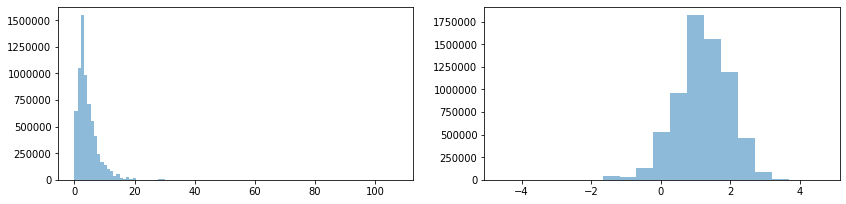

In [26]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14, 7))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

ax1.hist(df_prices['sell_price'], 100, alpha=0.5)
ax2.hist(np.log(df_prices['sell_price']), 19, alpha=0.5)
plt.show()

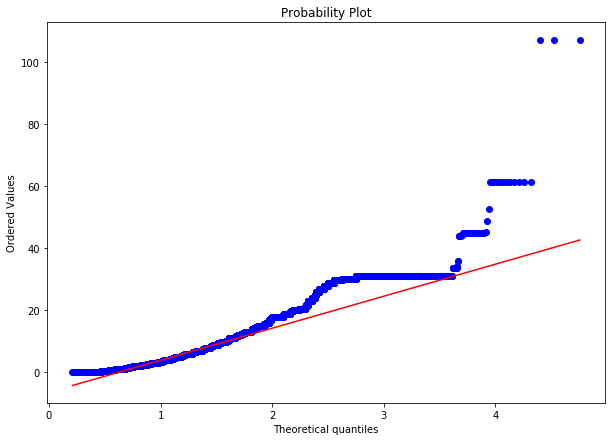

In [27]:
plt.rcParams['figure.figsize'] = 10, 7

s = 0.3
stats.probplot(df_prices['sell_price'], fit=True, dist=stats.lognorm, sparams=(s,), plot=plt)
plt.show()

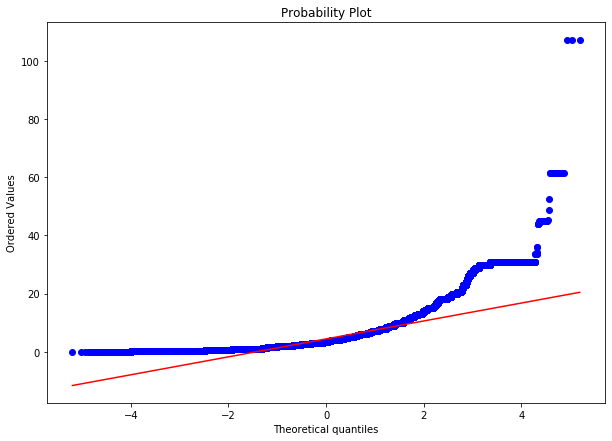

In [28]:
plt.rcParams['figure.figsize'] = 10, 7

stats.probplot(df_prices['sell_price'], fit=True, dist = "norm", plot = plt)
plt.show()

Похоже на нормальное или логнормальное распределение.

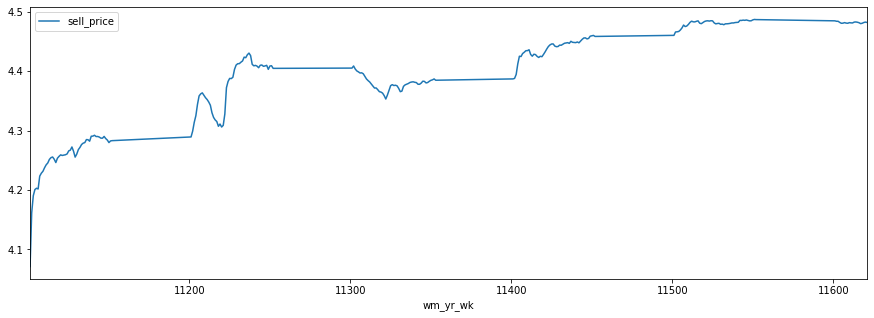

In [29]:
plt.rcParams['figure.figsize'] = 15, 5

df_prices.groupby(['wm_yr_wk'])[['sell_price']].mean().plot.line()

Цены растут со временем.

In [30]:
df_prices['category'] = df_prices['item_id'].map(lambda it: it[:-6])

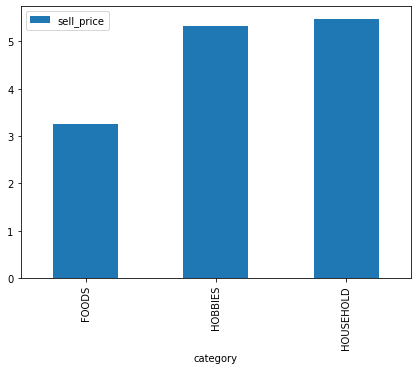

In [31]:
plt.rcParams['figure.figsize'] = 7, 5

df_prices.groupby(['category'])[['sell_price']].mean().plot.bar()

Еда в два раза дешевле товаров для хобби и для домашнего хозяйства.

Посмотрим на то как цена меняется в особенные дни.

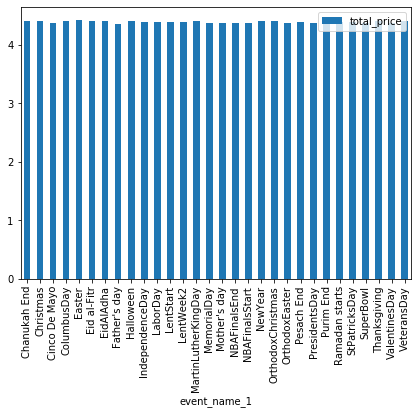

In [32]:
df_cl.groupby(['event_name_1'])[['total_price']].mean().plot.bar()

In [33]:
df_cl[df_cl['event_name_1'].isna() & df_cl['event_name_2'].isna()]['total_price'].mean(), \
df_cl[df_cl['event_name_1'].notna() | df_cl['event_name_2'].notna()]['total_price'].mean()

(4.390480560993689, 4.388422294966843)

В праздничные дни цены в среднем не отличаются от цен в обычные дни.

### Исследуем объем продаж

In [34]:
import matplotlib.pyplot as plt 
import statsmodels.api as sm
from pylab import rcParams

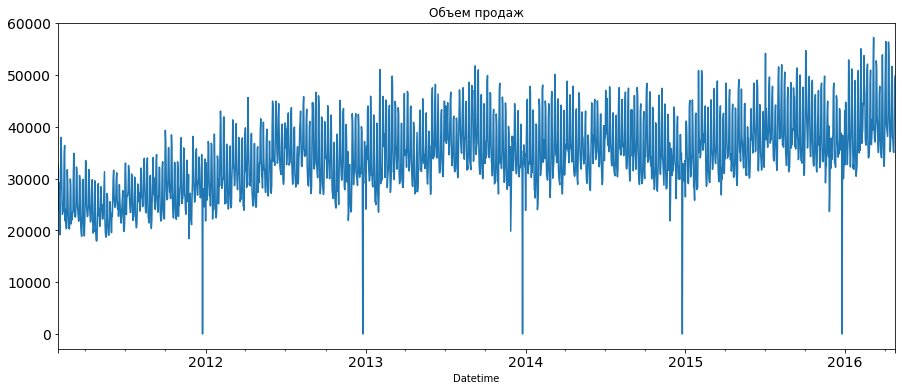

In [35]:
df_cl.total_sl_vl.plot( figsize=(15,6),title= 'Объем продаж', fontsize=14)

Кажется, ряд имеет аддитивный возрастающий тренд.

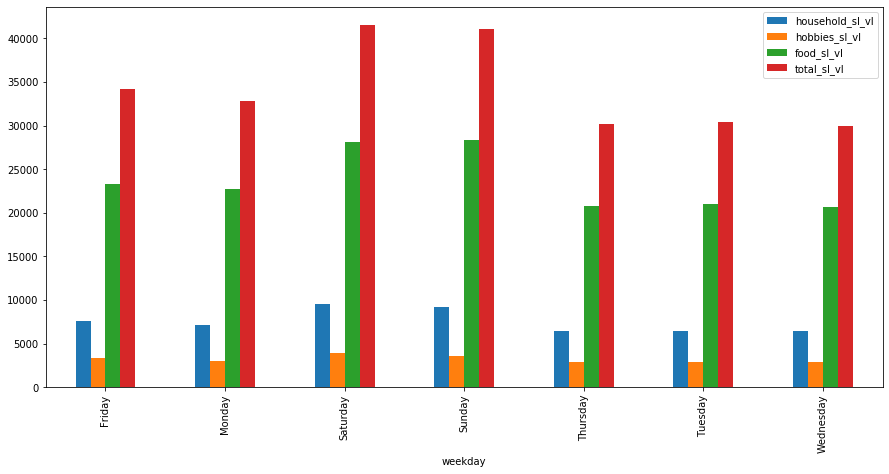

In [36]:
rcParams['figure.figsize'] = 15, 7

df_cl.groupby(['weekday'])[['household_sl_vl', 'hobbies_sl_vl', 'food_sl_vl', 'total_sl_vl']].mean().plot.bar()

Объем продаж в выходные возрастает. Сезонность по неделям.

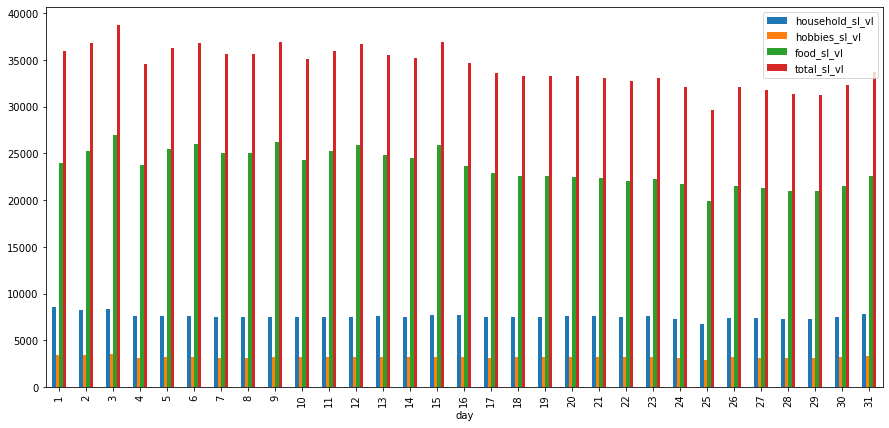

In [37]:
df_cl.groupby(['day'])[['household_sl_vl', 'hobbies_sl_vl', 'food_sl_vl', 'total_sl_vl']].mean().plot.bar()

Возможно, есть слабо выраженная месячная сезонность.

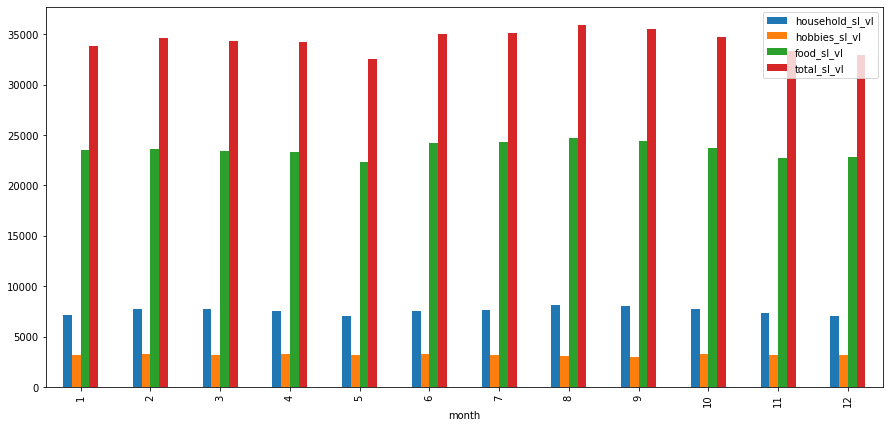

In [38]:
df_cl.groupby(['month'])[['household_sl_vl', 'hobbies_sl_vl', 'food_sl_vl', 'total_sl_vl']].mean().plot.bar()

Сезонность по годам плохо выражена.

Посмотрим что получится, если убрать восходящий тренд дифференцированием.

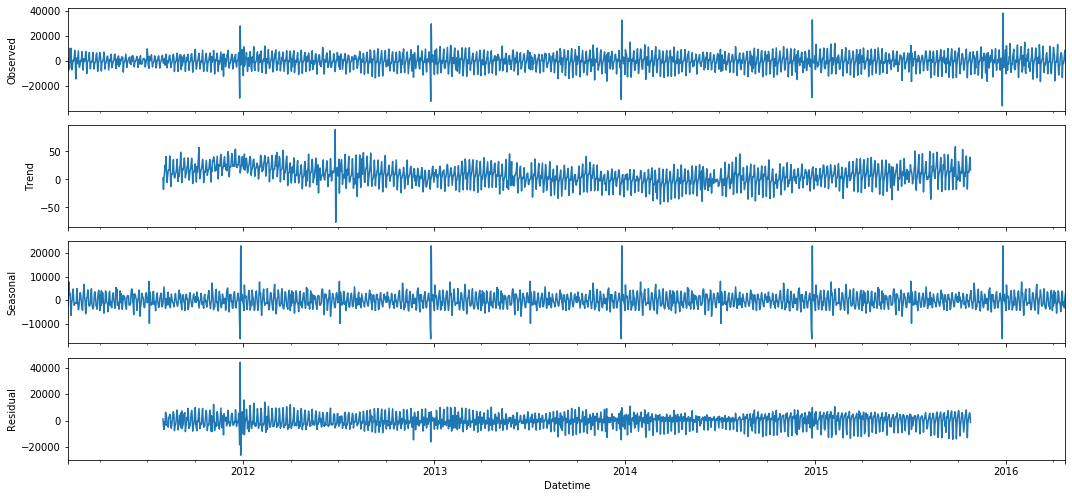

In [39]:
sample_data = df_cl.total_sl_vl
sample_data_diff = sample_data - sample_data.shift(1)

result = sm.tsa.seasonal_decompose(sample_data_diff[1:], model='additive',freq= 365)
result.plot()
plt.show()

Малоинформативно...

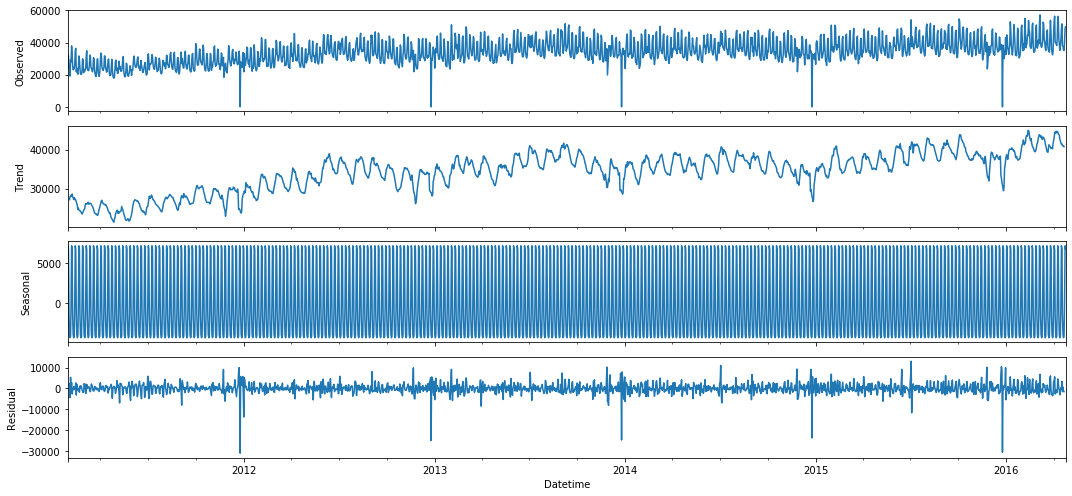

In [40]:
result = sm.tsa.seasonal_decompose(df_cl.total_sl_vl, model='additive',freq= 7)
result.plot()
plt.show()

После удаления компоненты цикличности по неделям, годовая сезонность стала чуть больше заметна, если судить по графику Trend выше.

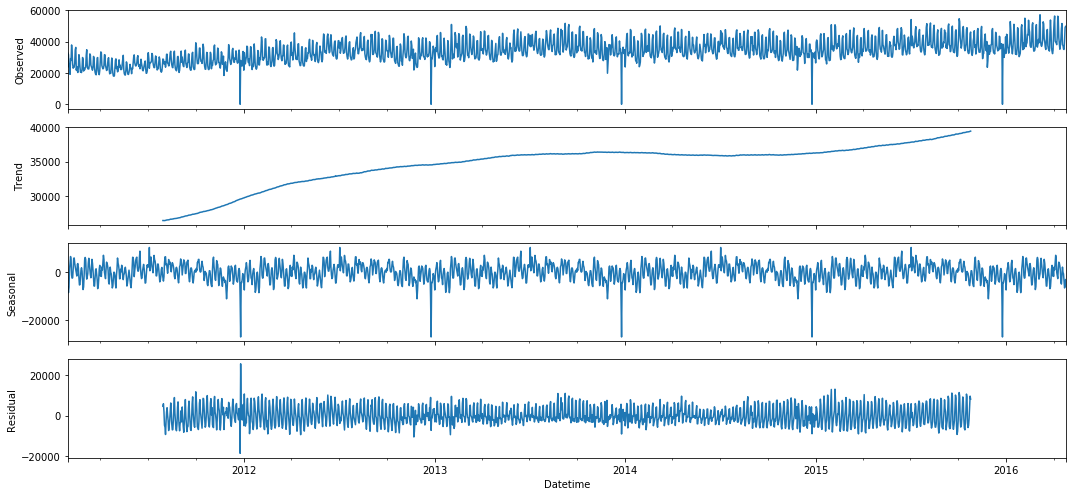

In [41]:
result = sm.tsa.seasonal_decompose(df_cl.total_sl_vl, model='additive',freq= 365)
result.plot()
plt.show()

Остаток более-менее похож на случайный шум. Значит, годовая сезонность действительно есть.

Дальше будем работать только с временным рядом из таблицы df_cl.

In [42]:
df_prices = []
df_sales = []

# 4. Проверка статистических гипотез.

Буду везде использовать уровень значимости $\alpha = 0.05$

In [43]:
df_cl.head()

,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,...,WI_HOBBIES_sl_vl,WI_HOUSEHOLD_sl_vl,total_TX_sl_vl,total_CA_sl_vl,total_WI_sl_vl,total_price,food_price,hobbies_price,household_price,day
Datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-29,11101,Saturday,1,1,2011,1,NaN,NaN,NaN,NaN,...,1083,1691,9438,14195,8998,4.071247,2.957808,4.671317,5.43495,29
2011-01-30,11101,Sunday,2,1,2011,2,NaN,NaN,NaN,NaN,...,926,1522,9630,13805,8314,4.071247,2.957808,4.671317,5.43495,30
2011-01-31,11101,Monday,3,1,2011,3,NaN,NaN,NaN,NaN,...,684,1107,6778,10108,6897,4.071247,2.957808,4.671317,5.43495,31
2011-02-01,11101,Tuesday,4,2,2011,4,NaN,NaN,NaN,NaN,...,455,985,7381,11047,6984,4.071247,2.957808,4.671317,5.43495,1
2011-02-02,11101,Wednesday,5,2,2011,5,NaN,NaN,NaN,NaN,...,132,354,5912,9925,3309,4.071247,2.957808,4.671317,5.43495,2


### Цены на товары для хобби и на товары для дома

С ценами на еду и на остальные вещи все понятно - они различны. Но достаточно ли хорошо с точки зрения статистической значимости различаются цены на товары для хобби и на товары для дома?

В блоке EDA я уже показывал, что распределение цены похоже на нормальное распределение. Пора проверить эту гипотезу критерием Шапиро-Уилка.

In [44]:
stats.shapiro(df_cl.hobbies_price)

(0.7918627858161926, 3.783505853677006e-44)

In [45]:
stats.shapiro(df_cl.household_price)

(0.9551988244056702, 8.717556713190841e-24)

Следовательно, можно воспользоваться критерий Стьюдента.

H0: цены на товары для хобби и на товары для дома равны

H1: цены на товары для хобби и на товары для дома различны

In [46]:
t_stat = stats.ttest_ind(df_cl.hobbies_price, df_cl.household_price)
t_stat

Ttest_indResult(statistic=-27.947914635996547, pvalue=1.4421329457375552e-156)

Значит, мы отвергаем гипотезу H0

### Спрос на товары по праздникам

H0: по праздникам и по обычным дням спрос на товары в среднем одинаков

H1: спрос товаров по праздникам не равен спросу товаров по обычным дням

In [47]:
holidays = df_cl[df_cl['event_name_1'].notna() | df_cl['event_name_2'].notna()]['total_sl_vl']
not_holidays = df_cl[df_cl['event_name_1'].isna() & df_cl['event_name_2'].isna()]['total_sl_vl']

In [48]:
stats.shapiro(holidays), \
stats.shapiro(not_holidays)

((0.9074099659919739, 2.552497058161407e-08),
 (0.9879970550537109, 6.47739153980531e-11))

In [49]:
t_stat = stats.ttest_ind(holidays, not_holidays)
t_stat

Ttest_indResult(statistic=-2.977109261170209, pvalue=0.0029463830423397063)

Таким образом спрос на товары зависит от праздников. Тут еще можно исследовать каждый праздник более подробно. Или рассматривать не конкретный день праздника, а, например, неделю перед праздником.

### Средний спрос по штатам

По EDA понятно, что спрос на товары в CA больше спроса в других штатах. Но равен ли спрос на товары в двух других штатах?

Так как спрос имеет тренд и сезонность. Возьмем для рассмотрения отрезок времени длиной в 365 дней.

In [50]:
year_df = df_cl[-365*2:-365]

In [51]:
WI_median = year_df.total_WI_sl_vl.median()
TX_median = year_df.total_TX_sl_vl.median()
WI_median, TX_median

(10046.0, 9884.0)

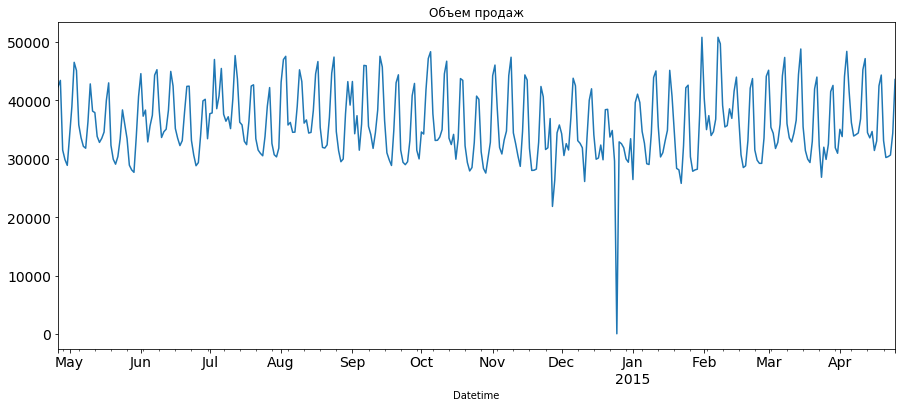

In [52]:
year_df.total_sl_vl.plot( figsize=(15,6),title= 'Объем продаж', fontsize=14)

Из-за того что график спроса очень волатильный, возможно, будет лучше примененить непараметрического критерия.

In [53]:
from statsmodels.stats.descriptivestats import sign_test

sign_test(year_df.total_WI_sl_vl, TX_median)

(14.5, 0.14265623056495516)

Получается, что за предпоследний год, спрос в штатах WI и TX был примерно одинаковым. Эту информацию можно использовать при построении прогноза для этих штатов. В них спрос на товары, скорее всего, будет похожим.

# 5. Предсказание временного ряда.

Сделаем прогноз продаж с помошью тройного экспоненциального сглаживания.

Напишем функцию для оценки качества. Будем использовать среднеквадратичную оценку.

In [54]:
from math import sqrt
from sklearn.metrics import mean_squared_error

def rmse(y_actual, y_predicted):
    rmse = sqrt(mean_squared_error(y_actual, y_predicted))
    return rmse

Обучаем модель.

In [55]:
df_cl.total_sl_vl = df_cl.total_sl_vl.astype('double')

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.model_selection import TimeSeriesSplit 

import warnings
warnings.filterwarnings('ignore')

In [56]:
tscv = TimeSeriesSplit(n_splits=800) 
seasonal = [None, 'add', 'mul']
trend = [None, 'add', 'mul']
period = [7, 30, 31]

min_err = max(df_cl.total_sl_vl)
best_param = (None, None, None)
for p in period:
    for t in trend:
        for s in seasonal:
            if t == 'mul' and s == 'add':
                break
            errors = []
            for train_idx, test_idx in tscv.split(df_cl.total_sl_vl):
                model = ExponentialSmoothing(np.asarray(df_cl.total_sl_vl.iloc[train_idx]), \
                                             seasonal_periods=p, seasonal=s, trend=t).fit()
                forecast = pd.Series(model.forecast(len(test_idx)))
                actual = df_cl.total_sl_vl.iloc[test_idx]
                error = rmse(actual.values, forecast.values)
                errors.append(error)
            curr_err = np.mean(errors)
            print('{}\tseasonal={},\ttrend={}\tperiod={}'.format(curr_err, s, t, p))
            if curr_err < min_err:
                min_err = curr_err
                best_param = (t, s, p)

6302.696136122963	seasonal=None,	trend=None	period=7
2615.651872497673	seasonal=add,	trend=None	period=7
2569.4232178670336	seasonal=mul,	trend=None	period=7
6338.155109182927	seasonal=None,	trend=add	period=7
2626.4364483000104	seasonal=add,	trend=add	period=7
2587.0287428037227	seasonal=mul,	trend=add	period=7
6318.688828216074	seasonal=None,	trend=mul	period=7
6302.696136122963	seasonal=None,	trend=None	period=30
5549.795126734916	seasonal=add,	trend=None	period=30
5548.786745702422	seasonal=mul,	trend=None	period=30
6338.155109182927	seasonal=None,	trend=add	period=30
5889.106929933976	seasonal=add,	trend=add	period=30
5784.217624628784	seasonal=mul,	trend=add	period=30
6318.688828216074	seasonal=None,	trend=mul	period=30
6302.696136122963	seasonal=None,	trend=None	period=31
5584.23163898552	seasonal=add,	trend=None	period=31
5635.744189159821	seasonal=mul,	trend=None	period=31
6338.155109182927	seasonal=None,	trend=add	period=31
5841.000677069794	seasonal=add,	trend=add	period=31


Посмотрим как сильно мы ошибаемся в колчистве покупок в процентном отношении:

In [57]:
print('Total sales:', df_cl.total_sl_vl.mean())
print('Errors percent:', min_err / df_cl.total_sl_vl.mean())

Total sales: 34341.562467328804
Errors percent: 0.0748196364190325


Нормально. Предсказываем с лучшими параметрами модели:

In [58]:
model = ExponentialSmoothing(np.asarray(df_cl.total_sl_vl), seasonal_periods=best_param[2], \
                             seasonal=best_param[1], trend=best_param[0]).fit()
pred = model.forecast(30)

In [59]:
import datetime

new_dates = []
for d in range(25,31):
    new_dates.append(datetime.datetime(2016, 4, d))
for d in range(1,25):
    new_dates.append(datetime.datetime(2016, 5, d))
    
pred_df = pd.DataFrame(index=new_dates, data=pred)

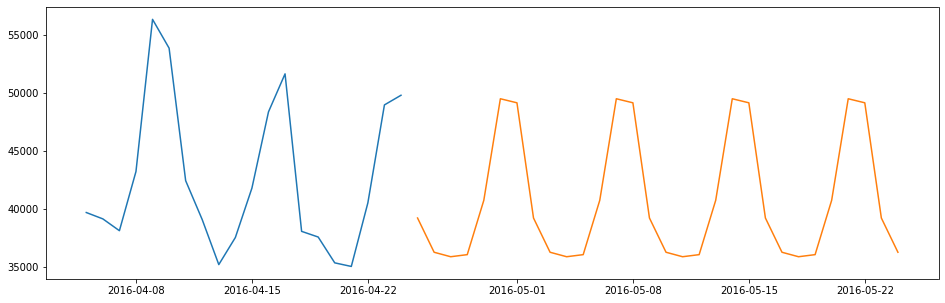

In [60]:
plt.figure(figsize=(16,5))

plt.plot(df_cl.total_sl_vl[-20:])
plt.plot(pred_df)

plt.show()

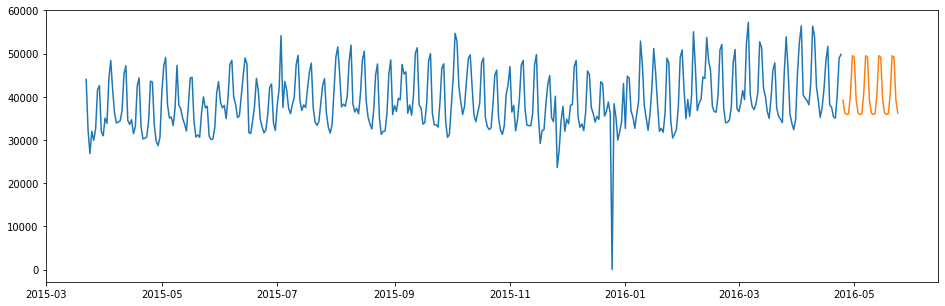

In [61]:
plt.figure(figsize=(16,5))

plt.plot(df_cl.total_sl_vl[-400:])
plt.plot(pred_df)

plt.show()

# 6. Выводы

Сделать выводы о проделанном исследовании (3 балла) - указать, какие инсайты были найдены, о чем свидетельствует сделанный прогноз и выводы, полученные в ходе проверки статистических гипотез.

Надо сделать линейную модель предсказания на основе временного ряда. Временной ряд имеет сезонность по неделям, по году и восходящий тренд. Товары категории FOOD и товары из магазинов штата CA отличаются от остальных категорий товаров и штатов. В предсказании можно объединять категорию HOBBIES и HOUSEHOLD а так же штат WI и TX. Найдена корреляция между праздниками и спросом, но она не очень выражена. Но тут надо более детальное исследование. Корреляцию между ценой и спросом так же стоит исследовать еще.